In [ ]:
!unzip /content/test.zip

Archive:  /content/test.zip
   creating: cats/
  inflating: cats/cat_190.jpg        
  inflating: cats/cat_147.jpg        
  inflating: cats/cat_542.jpg        
  inflating: cats/cat_595.jpg        
  inflating: cats/cat_422.jpg        
  inflating: cats/cat_583.jpg        
  inflating: cats/cat_384.jpg        
  inflating: cats/cat_586.jpg        
  inflating: cats/cat_545.jpg        
  inflating: cats/cat_223.jpg        
  inflating: cats/cat_551.jpg        
  inflating: cats/cat_587.jpg        
  inflating: cats/cat_140.jpg        
  inflating: cats/cat_342.jpg        
  inflating: cats/cat_430.jpg        
  inflating: cats/cat_418.jpg        
  inflating: cats/cat_395.jpg        
  inflating: cats/cat_156.jpg        
  inflating: cats/cat_585.jpg        
  inflating: cats/cat_234.jpg        
  inflating: cats/cat_355.jpg        
  inflating: cats/cat_433.jpg        
  inflating: cats/cat_341.jpg        
  inflating: cats/cat_332.jpg        
  inflating: cats/cat_468.jpg        
  i

In [ ]:
!pip install augly
!pip install --upgrade augly -q
!pip install nlpaug -q

In [ ]:
import os
from sklearn.model_selection import train_test_split

# Define the directories for cats and dogs
cat_dir = '/content/cats'  # Replace with the actual path to the cats folder
dog_dir = '/content/dogs'  # Replace with the actual path to the dogs folder

# Get list of all images for cats and dogs
cat_images = [os.path.join(cat_dir, f) for f in os.listdir(cat_dir) if f.endswith(('.jpg', '.png'))]
dog_images = [os.path.join(dog_dir, f) for f in os.listdir(dog_dir) if f.endswith(('.jpg', '.png'))]

train_cat_images, test_cat_images = train_test_split(cat_images, test_size=0.2, random_state=42)

train_dog_images, test_dog_images = train_test_split(dog_images, test_size=0.2, random_state=42)

train_images = train_cat_images + train_dog_images
test_images = test_cat_images + test_dog_images

train_labels = [0] * len(train_cat_images) + [1] * len(train_dog_images)
test_labels = [0] * len(test_cat_images) + [1] * len(test_dog_images)

print(f"Number of training images: {len(train_images)}")
print(f"Number of test images: {len(test_images)}")


Number of training images: 112
Number of test images: 28


In [ ]:
import os
import random
from PIL import Image
import augly.image as imaugs
from sklearn.model_selection import train_test_split

def random_data_augmentations(image, num_augmentations=3):
    # Define a list of augmentation functions (names as strings)
    augmentations = [
        "RandomBrightness",
        "ShufflePixels",
        "color_jitter",
        "rotate_30",
        "blur",
        "brightness",
        "crop",
        "pad",
        "hflip",
        "vflip"
    ]

    # Apply `num_augmentations` random augmentations to the image
    chosen_augs = random.sample(augmentations, num_augmentations)

    augmented_image = image
    for aug_name in chosen_augs:
        if aug_name == "RandomBrightness":
            augmented_image = imaugs.RandomBrightness(min_factor=0.7, max_factor=1.3)(augmented_image)
        elif aug_name == "ShufflePixels":
            augmented_image = imaugs.ShufflePixels(factor=0.1)(augmented_image)
        elif aug_name == "color_jitter":
            augmented_image = imaugs.color_jitter(augmented_image, brightness_factor=1.5, saturation_factor=2.0)
        elif aug_name == "rotate_30":
            augmented_image = imaugs.rotate(augmented_image, degrees=30)
        elif aug_name == "blur":
            augmented_image = imaugs.blur(augmented_image, radius=2)
        elif aug_name == "brightness":
            augmented_image = imaugs.brightness(augmented_image, factor=1.0)
        elif aug_name == "crop":
            augmented_image = imaugs.crop(augmented_image, x1=0.25, x2=0.75, y1=0.25, y2=0.75)
        elif aug_name == "pad":
            augmented_image = imaugs.pad(augmented_image)
        elif aug_name == "hflip":
            augmented_image = imaugs.hflip(augmented_image)
        elif aug_name == "vflip":
            augmented_image = imaugs.vflip(augmented_image)

    return augmented_image

train_images_with_aug = []
train_labels_with_aug = []
categories = ['cats', 'dogs']
# Perform augmentation
augmented_path = '/content/augmented_train'
os.makedirs(augmented_path, exist_ok=True)

for label, (category, image_list) in enumerate(zip(categories, [train_cat_images, train_dog_images])):
    category_aug_path = os.path.join(augmented_path, category)
    os.makedirs(category_aug_path, exist_ok=True)

    for img_path in image_list:
        image = Image.open(img_path).convert("RGB")
        img_name = os.path.basename(img_path)
        train_images_with_aug.append(image)
        train_labels_with_aug.append(label)

        for i in range(2):  # Augment each image twice
            augmented_image = random_data_augmentations(image, num_augmentations=3)
            aug_img_name = f"aug_{i}_{img_name}"
            aug_img_path = os.path.join(category_aug_path, aug_img_name)
            augmented_image.save(aug_img_path)
            train_images_with_aug.append(augmented_image)
            train_labels_with_aug.append(label)
# Update train dataset with augmented images
total_train_images = len(train_images)
total_augmented_images = sum(len(os.listdir(os.path.join(augmented_path, cat))) for cat in ['cats', 'dogs'])

# Print dataset statistics
print(f"Original dataset size: {len(cat_images) + len(dog_images)}")
print(f"Train set before augmentation: {total_train_images}")
print(f"Test set: {len(test_images)}")
print(f"Augmented images added: {total_augmented_images}")
print(f"Total train images after augmentation: {total_train_images + total_augmented_images}")

Original dataset size: 140
Train set before augmentation: 112
Test set: 28
Augmented images added: 224
Total train images after augmentation: 336


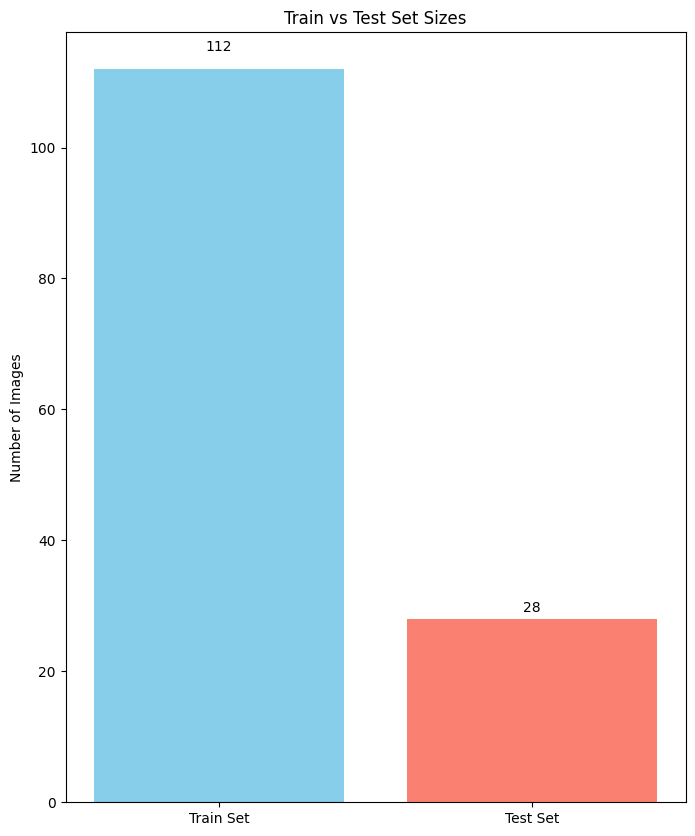

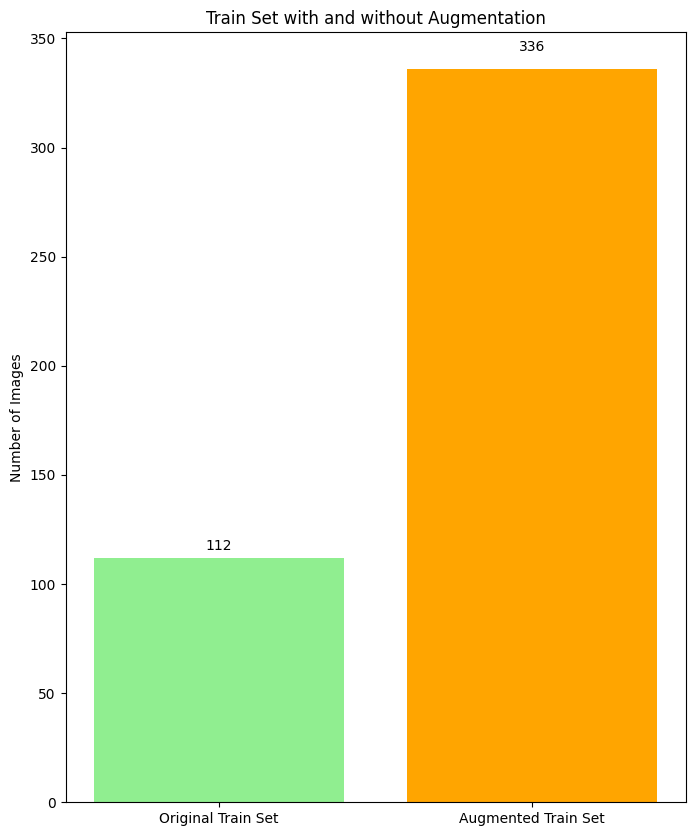

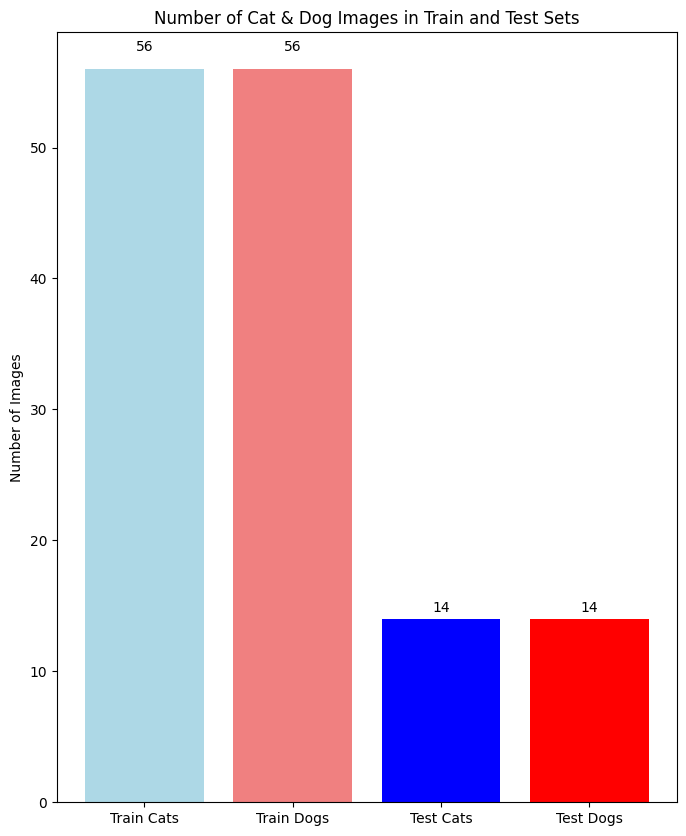

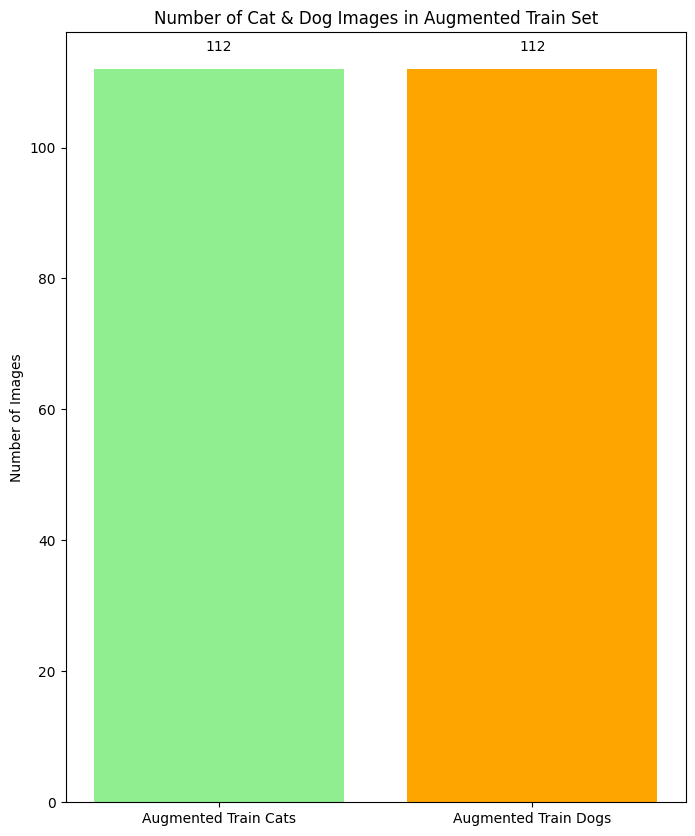

In [ ]:
import matplotlib.pyplot as plt

# Dataset sizes
original_train_size = len(train_images)
test_size = len(test_images)
augmented_train_size = original_train_size + total_augmented_images

# Counts of cat and dog images in train and test sets
cat_train_count = len(train_cat_images)
dog_train_count = len(train_dog_images)
cat_test_count = len(test_cat_images)
dog_test_count = len(test_dog_images)

# Counts after augmentation
augmented_cat_train_count = sum(1 for img in os.listdir(os.path.join(augmented_path, 'cats')))
augmented_dog_train_count = sum(1 for img in os.listdir(os.path.join(augmented_path, 'dogs')))

# Plot 1: Train vs Test set sizes
plt.figure(figsize=(8, 10))
bars = plt.bar(['Train Set', 'Test Set'], [original_train_size, test_size], color=['skyblue', 'salmon'])
plt.title('Train vs Test Set Sizes')
plt.ylabel('Number of Images')

# Add labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02 * yval, int(yval), ha='center', va='bottom')

plt.show()

# Plot 2: Augmented vs Original Train Set Sizes
plt.figure(figsize=(8, 10))
bars = plt.bar(['Original Train Set', 'Augmented Train Set'], [original_train_size, augmented_train_size], color=['lightgreen', 'orange'])
plt.title('Train Set with and without Augmentation')
plt.ylabel('Number of Images')

# Add labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02 * yval, int(yval), ha='center', va='bottom')

plt.show()

# Plot 3: Cat & Dog counts in Train and Test Sets
labels = ['Train Cats', 'Train Dogs', 'Test Cats', 'Test Dogs']
counts = [cat_train_count, dog_train_count, cat_test_count, dog_test_count]

plt.figure(figsize=(8, 10))
bars = plt.bar(labels, counts, color=['lightblue', 'lightcoral', 'blue', 'red'])
plt.title('Number of Cat & Dog Images in Train and Test Sets')
plt.ylabel('Number of Images')

# Add labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02 * yval, int(yval), ha='center', va='bottom')

plt.show()

# Plot 4: Augmented Cat & Dog Counts
labels_augmented = ['Augmented Train Cats', 'Augmented Train Dogs']
counts_augmented = [augmented_cat_train_count, augmented_dog_train_count]

plt.figure(figsize=(8, 10))
bars = plt.bar(labels_augmented, counts_augmented, color=['lightgreen', 'orange'])
plt.title('Number of Cat & Dog Images in Augmented Train Set')
plt.ylabel('Number of Images')

# Add labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02 * yval, int(yval), ha='center', va='bottom')

plt.show()


In [ ]:
import augly.image as imaugs
import requests
from PIL import Image
from io import BytesIO
from transformers import AutoModelForImageClassification, AutoFeatureExtractor
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
# Load the model with new weights
model_name = "microsoft/resnet-50"
model = AutoModelForImageClassification.from_pretrained(model_name, num_labels=2, ignore_mismatched_sizes=True)  # 2 classes: Cat & Dog
# Added ignore_mismatched_sizes=True to handle the shape mismatch
model.init_weights()

# Load the feature extractor for preprocessing images
feature_extractor = AutoFeatureExtractor.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/69.6k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of ResNetForImageClassification were not initialized from the model checkpoint at microsoft/resnet-50 and are newly initialized because the shapes did not match:
- classifier.1.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.1.weight: found shape torch.Size([1000, 2048]) in the checkpoint and torch.Size([2, 2048]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


preprocessor_config.json:   0%|          | 0.00/266 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/convnext/feature_extraction_convnext.py:28: FutureWarning: The class ConvNextFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ConvNextImageProcessor instead.
  warnings.warn(


**The Architecture Diagram of the model taken:**

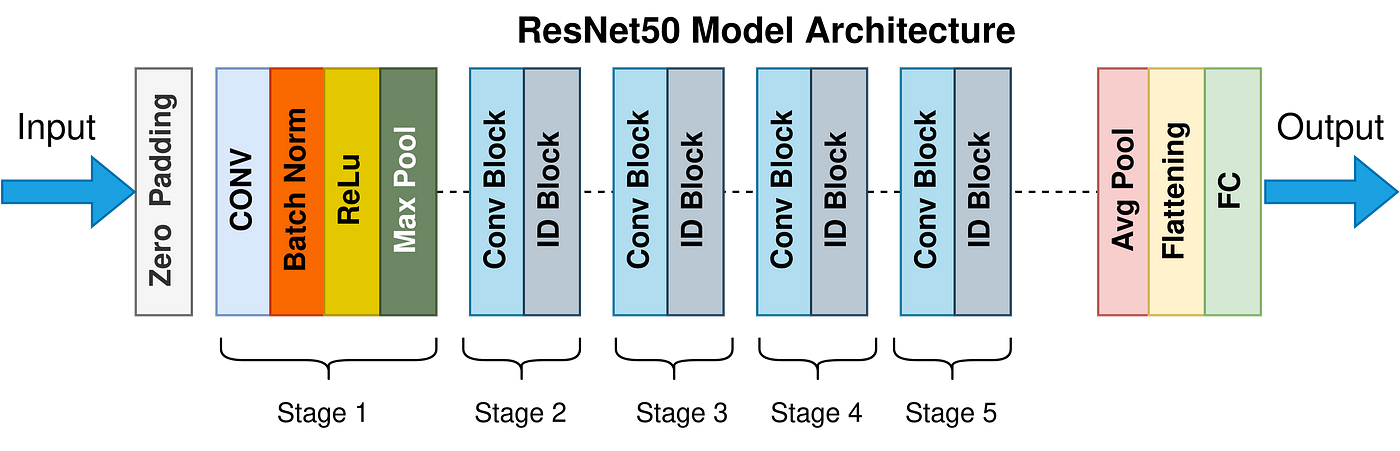

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import models, transforms
import torch.optim as optim
import torch.nn as nn
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from PIL import Image

# Custom dataset class
class CustomImageDataset(Dataset):
    def __init__(self, image_list, labels, transform=None):
        self.image_list = image_list
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        img = self.image_list[idx]
        img = Image.open(img).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            img = self.transform(img)

        return img, label

# Use the transform without augmentation
transform_no_augmentation = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Prepare the dataset without augmentation
train_dataset_no_aug = CustomImageDataset(train_images, train_labels, transform=transform_no_augmentation)

# Create DataLoader for training
train_loader_no_aug = DataLoader(train_dataset_no_aug, batch_size=32, shuffle=True)

# Load the pre-trained ResNet50 model
model_no_aug = models.resnet50(pretrained=True)

# Modify the final layer to match our number of classes (2 in this case: cats and dogs)
model_no_aug.fc = nn.Linear(model_no_aug.fc.in_features, 2)

# Move the model to the GPU (if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_no_aug = model_no_aug.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_no_aug.parameters(), lr=0.001)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model_no_aug.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader_no_aug:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model_no_aug(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader_no_aug)
    epoch_accuracy = 100 * correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

# Now let's evaluate on the test set (use `transform_no_augmentation` for test as well)
transform_no_augmentation_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Prepare the test dataset (same list as used above but for test images)
test_dataset_no_aug = CustomImageDataset(test_images, test_labels, transform=transform_no_augmentation_test)

# Create DataLoader for testing
test_loader_no_aug = DataLoader(test_dataset_no_aug, batch_size=32, shuffle=False)

# Evaluation loop
model_no_aug.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader_no_aug:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_no_aug(inputs)
        _, predicted = torch.max(outputs, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate metrics
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)
accuracy = accuracy_score(all_labels, all_preds)

print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 137MB/s]


Epoch 1/5, Loss: 0.3901, Accuracy: 76.79%
Epoch 2/5, Loss: 0.4414, Accuracy: 83.04%
Epoch 3/5, Loss: 0.2281, Accuracy: 93.75%
Epoch 4/5, Loss: 0.1001, Accuracy: 96.43%
Epoch 5/5, Loss: 0.0674, Accuracy: 98.21%
Test Precision: 0.5185
Test Recall: 1.0000
Test F1 Score: 0.6829
Test Accuracy: 0.5357


 The model trained without augmentation showed poor results, with low precision (0.5185) and accuracy (0.5357) on the test set. This suggests that the model might have overfitted to the training data, as it was unable to generalize well to the test set. Without augmentation, the model had limited exposure to diverse variations in the data, which may have led to poor performance when faced with new, unseen examples. Essentially, the model might have learned features specific to the training data and struggled with the variability present in the test set.

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import models, transforms
import torch.optim as optim
import torch.nn as nn
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from PIL import Image

# Custom Dataset for PyTorch
class CustomDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = self.image_paths[idx]
        if not isinstance(img, Image.Image):  # Check if it's not already a PIL Image
            img = Image.open(img).convert("RGB")

        label = self.labels[idx]

        if self.transform:
            img = self.transform(img)

        return img, label

# Define transformations with augmentation
transform_with_augmentation = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(224),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Standard ResNet normalization
])

train_dataset_with_aug = CustomDataset(train_images_with_aug, train_labels_with_aug, transform=transform_with_augmentation)
train_loader = DataLoader(train_dataset_with_aug, batch_size=32, shuffle=True)

# Define the model (ResNet-50)
model = models.resnet50(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 2)  # Assuming binary classification (cats vs dogs)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = (correct_predictions / total_predictions) * 100
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f} - Accuracy: {epoch_accuracy:.2f}%")

# Evaluation on the test set with the same augmentation transformations
test_dataset = CustomDataset(test_images, test_labels, transform=transform_with_augmentation)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Set model to evaluation mode
model.eval()

# Initialize lists to store predictions and true labels
predictions = []
true_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Compute metrics
# print(f"Classification Report:\n{classification_report(true_labels, predictions)}")

precision = precision_score(true_labels, predictions)
recall = recall_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions)
accuracy = accuracy_score(true_labels, predictions)

print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/5 - Loss: 0.9033 - Accuracy: 55.06%
Epoch 2/5 - Loss: 0.7994 - Accuracy: 44.64%
Epoch 3/5 - Loss: 0.7065 - Accuracy: 55.06%
Epoch 4/5 - Loss: 0.7339 - Accuracy: 54.17%
Epoch 5/5 - Loss: 0.6770 - Accuracy: 61.61%
Test Precision: 0.7692
Test Recall: 0.7143
Test F1 Score: 0.7407
Test Accuracy: 0.7500


In contrast, the model trained with augmentation performed much better, with a test accuracy of 0.7500 and a more balanced precision (0.7692) and recall (0.7143). The improved performance suggests that the increased data variability from augmentation helped the model generalize better. By exposing the model to more diverse transformations of the data, it was able to learn more generalized features, which helped it perform better on the test set. Augmentation prevented overfitting by providing more varied examples, making the model more robust and adaptable to unseen data.